In [3]:
import pandas as pd
import os

data_dir = "yellow_taxi_datasets"
csv_files = [f for f in os.listdir(data_dir) if f.endswith(".csv")]
df_list = [pd.read_csv(os.path.join(data_dir, file)) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)

In [4]:
print(f"Combined shape: {df.shape}")
df.head()

Combined shape: (47248845, 20)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,RatecodeID
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1.0,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05,NaN
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1.0,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80,NaN
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1.0,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80,NaN
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1.0,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,NaN
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1.0,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30,NaN


# Feature Engineering

In [6]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

df = df[(df['trip_duration'] > 0) & (df['trip_duration'] < 180)]
df = df[(df['trip_distance'] > 0) & (df['trip_distance'] < 100)]

df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['weekday'] = df['tpep_pickup_datetime'].dt.dayofweek
df['month'] = df['tpep_pickup_datetime'].dt.month
df['day_name'] = df['tpep_pickup_datetime'].dt.day_name()

df.rename(columns={
    'pickup_latitude': 'pickup_lat',
    'pickup_longitude': 'pickup_lon',
    'dropoff_latitude': 'dropoff_lat',
    'dropoff_longitude': 'dropoff_lon'
}, inplace=True)

df.drop(columns=['RatecodeID'], inplace=True, errors='ignore')

# Data Visualization

## Trip Duration vs. Trip Distance

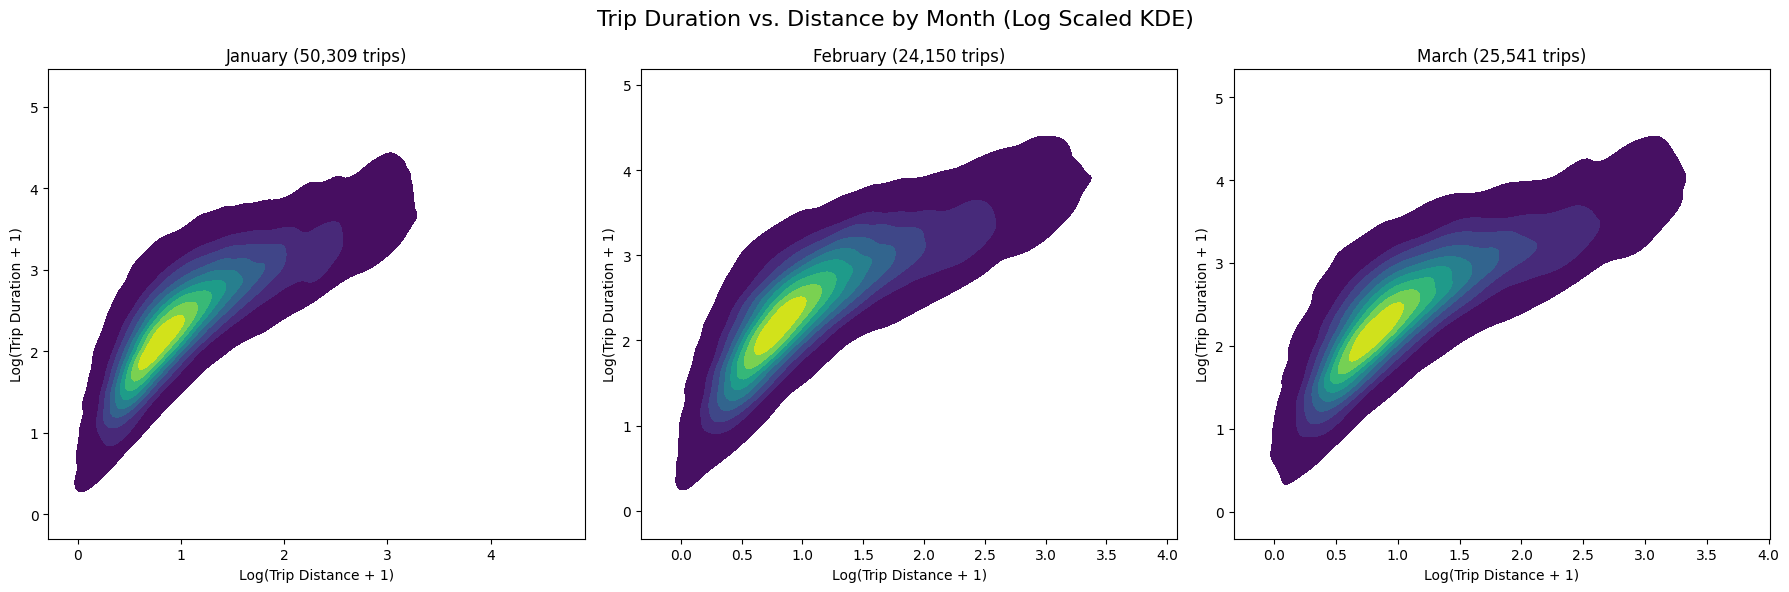

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sample_df['month'] = sample_df['tpep_pickup_datetime'].dt.month

titles = {1: "January", 2: "February", 3: "March"}
available_months = sorted(sample_df['month'].unique())

fig, axes = plt.subplots(1, len(available_months), figsize=(6 * len(available_months), 6))

if len(available_months) == 1:
    axes = [axes]

for ax, month in zip(axes, available_months):
    month_df = sample_df[sample_df['month'] == month]
    sns.kdeplot(
        data=month_df,
        x="log_distance",
        y="log_duration",
        cmap="viridis",
        fill=True,
        thresh=0.01,
        ax=ax
    )
    ax.set_title(f"{titles.get(month, f'Month {month}')} ({len(month_df):,} trips)")
    ax.set_xlabel("Log(Trip Distance + 1)")
    ax.set_ylabel("Log(Trip Duration + 1)")

plt.suptitle("Trip Duration vs. Distance by Month (Log Scaled KDE)", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

## Number of Trips by Hour of the Day

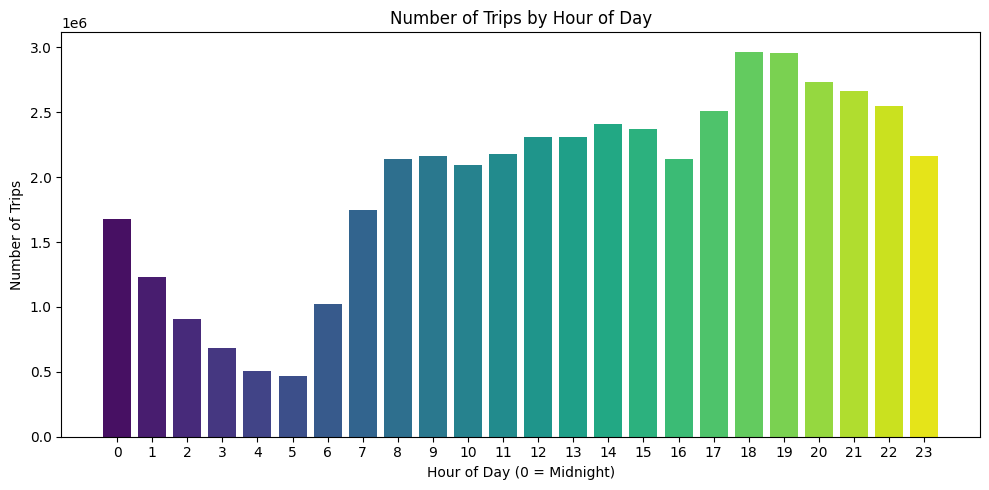

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

hour_counts = df['hour'].value_counts().sort_index()
colors = sns.color_palette("viridis", len(hour_counts))

plt.figure(figsize=(10, 5))
plt.bar(hour_counts.index, hour_counts.values, color=colors)
plt.title("Number of Trips by Hour of Day")
plt.xlabel("Hour of Day (0 = Midnight)")
plt.ylabel("Number of Trips")
plt.xticks(range(24))
plt.tight_layout()
plt.show()

## Number of Taxi Trips by Day of the Week

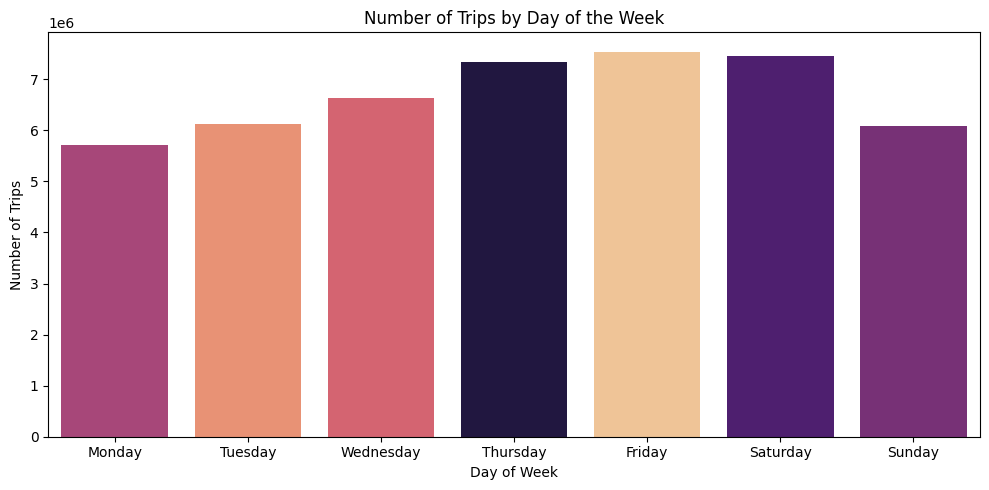

In [10]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='day_name', order=day_order, hue='day_name', palette='magma', legend=False)
plt.title("Number of Trips by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.show()